In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp


In [2]:
import pandas as pd

# Load all datasets
df_calls = pd.read_csv('callsf0d4f5a.csv')
df_customers = pd.read_csv('customers2afd6ea.csv')
df_reasons = pd.read_csv('reason18315ff.csv')
df_sentiment = pd.read_csv('sentiment_statisticscc1e57a.csv')


In [3]:
# Check for missing values
missing_calls = df_calls.isnull().sum()
missing_customers = df_customers.isnull().sum()
missing_reasons = df_reasons.isnull().sum()
missing_sentiment = df_sentiment.isnull().sum()

# Display missing values
print("Missing Values in Calls DataFrame:\n", missing_calls)
print("\nMissing Values in Customers DataFrame:\n", missing_customers)
print("\nMissing Values in Reasons DataFrame:\n", missing_reasons)
print("\nMissing Values in Sentiment DataFrame:\n", missing_sentiment)


Missing Values in Calls DataFrame:
 call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

Missing Values in Customers DataFrame:
 customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64

Missing Values in Reasons DataFrame:
 call_id                0
primary_call_reason    0
dtype: int64

Missing Values in Sentiment DataFrame:
 call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [4]:
# Percentage of missing values in df_customers
missing_loyalty = (df_customers['elite_level_code'].isnull().sum() / len(df_customers)) * 100
missing_tone = (df_sentiment['agent_tone'].isnull().sum() / len(df_customers)) * 100
missing_sentiment = (df_sentiment['average_sentiment'].isnull().sum() / len(df_customers)) * 100
print(missing_loyalty)
print(missing_tone)
print(missing_sentiment)

35.88218911015179
0.3021863250243699
0.15178944436707978


In [5]:
# handling the missing values in customers table
df_customers.head(10)
missing_count = df_customers['elite_level_code'].isnull().sum()
df_customers['elite_level_code'] = df_customers['elite_level_code'].fillna(-1)
print(df_customers.isnull().sum())

customer_id         0
customer_name       0
elite_level_code    0
dtype: int64


In [6]:
# handling the missing values in sentiments table
df_sentiment = df_sentiment.dropna(subset=['agent_tone', 'average_sentiment'])
df_sentiment.describe()

,call_id,agent_id,average_sentiment,silence_percent_average
count,7.159300e+04,71593.000000,71593.000000,71593.000000
mean,4.993478e+09,564706.158814,-0.032592,0.285689
std,2.889637e+09,257520.519491,0.141484,0.191922
min,1.316420e+05,102574.000000,-0.940000,0.000000
25%,2.478796e+09,347606.000000,-0.110000,0.130000
50%,4.989537e+09,591778.000000,-0.020000,0.260000
75%,7.492895e+09,786323.000000,0.050000,0.410000
max,9.999806e+09,993862.000000,2.670000,0.980000


In [7]:
#checking for duplicates
cls = df_calls.duplicated().sum()
cus = df_customers.duplicated().sum()
rea = df_reasons.duplicated().sum()
sent = df_sentiment.duplicated().sum()
print(cls, cus, rea, sent)

0 0 0 0


In [8]:
# Convert datetime columns in calls DataFrame
df_calls['call_start_datetime'] = pd.to_datetime(df_calls['call_start_datetime'])
df_calls['agent_assigned_datetime'] = pd.to_datetime(df_calls['agent_assigned_datetime'])
df_calls['call_end_datetime'] = pd.to_datetime(df_calls['call_end_datetime'])

In [9]:
# Clean call transcripts
df_calls['call_transcript'] = df_calls['call_transcript'].str.replace(r'\n', ' ').str.strip()


/var/folders/n9/xrhw7t1n1xs1bwwzqvckjkzh0000gn/T/ipykernel_9053/2850760961.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_calls['call_transcript'] = df_calls['call_transcript'].str.replace(r'\n', ' ').str.strip()


In [10]:
df_calls['call_transcript'][0]

"Agent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?  Customer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this.   Agent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.  Customer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day.   Agent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help make this u

In [11]:
# Check and correct data types
print("\nData Types in Calls DataFrame:\n", df_calls.dtypes)
print("\nData Types in Customers DataFrame:\n", df_customers.dtypes)
print("\nData Types in Reasons DataFrame:\n", df_reasons.dtypes)
print("\nData Types in Sentiment DataFrame:\n", df_sentiment.dtypes)


Data Types in Calls DataFrame:
 call_id                             int64
customer_id                         int64
agent_id                            int64
call_start_datetime        datetime64[ns]
agent_assigned_datetime    datetime64[ns]
call_end_datetime          datetime64[ns]
call_transcript                    object
dtype: object

Data Types in Customers DataFrame:
 customer_id           int64
customer_name        object
elite_level_code    float64
dtype: object

Data Types in Reasons DataFrame:
 call_id                 int64
primary_call_reason    object
dtype: object

Data Types in Sentiment DataFrame:
 call_id                      int64
agent_id                     int64
agent_tone                  object
customer_tone               object
average_sentiment          float64
silence_percent_average    float64
dtype: object


In [12]:
#datatype change
df_customers['elite_level_code'] = df_customers['elite_level_code'].astype(int)


In [13]:
df_sentiment.describe()

,call_id,agent_id,average_sentiment,silence_percent_average
count,7.159300e+04,71593.000000,71593.000000,71593.000000
mean,4.993478e+09,564706.158814,-0.032592,0.285689
std,2.889637e+09,257520.519491,0.141484,0.191922
min,1.316420e+05,102574.000000,-0.940000,0.000000
25%,2.478796e+09,347606.000000,-0.110000,0.130000
50%,4.989537e+09,591778.000000,-0.020000,0.260000
75%,7.492895e+09,786323.000000,0.050000,0.410000
max,9.999806e+09,993862.000000,2.670000,0.980000


In [14]:
# Calculating call duration in df_calls
df_calls['AHT'] = (df_calls['call_end_datetime'] - df_calls['call_start_datetime']).dt.total_seconds() / 60  # AHT in minutes
df_calls.describe()

,call_id,customer_id,agent_id,AHT
count,7.181000e+04,7.181000e+04,71810.000000,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039,18.901936
std,2.889673e+09,2.884255e+09,257532.362167,13.079690
min,1.316420e+05,1.197800e+04,102574.000000,3.000000
25%,2.480013e+09,2.514618e+09,347606.000000,11.000000
50%,4.989448e+09,4.999664e+09,591778.000000,15.000000
75%,7.493629e+09,7.509126e+09,786323.000000,22.000000
max,9.999806e+09,9.999935e+09,993862.000000,129.000000


In [15]:
# Calculate AHT agent
aht_by_agent = df_calls.groupby('agent_id')['AHT'].mean().reset_index()

# Top performing and Least Performing agent
Top_performing = aht_by_agent.sort_values(by='AHT', ascending=False).head()
Least_performing = aht_by_agent.sort_values(by='AHT', ascending=True).head()
print("Top performing:")
print(Top_performing)
print("Least performing:")
print(Least_performing)

Top performing:
     agent_id        AHT
0      102574  68.000000
160    506130  55.000000
16     140146  49.666667
60     255256  48.333333
187    558705  40.000000
Least performing:
     agent_id        AHT
210    616988   9.000000
48     229129  12.666667
184    547592  13.000000
23     161354  13.000000
238    676262  14.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge df_calls with df_reasons to get primary_call_reason
df_calls = df_calls.merge(df_reasons, on='call_id', how='left')

df_calls

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,Agent: Thank you for calling United Airlines c...,38.0,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,"Agent: Thank you for calling United Airlines, ...",15.0,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,Agent: Thank you for calling United Airlines c...,27.0,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,Agent: Thank you for calling United Airlines c...,12.0,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,Agent: Thank you for calling United Airlines c...,19.0,Seating
...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,Agent: Thank you for calling United Airlines c...,37.0,Post Flight
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,Agent: Thank you for calling United Airlines c...,11.0,Upgrade
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,Agent: Thank you for calling United Airlines c...,12.0,Upgrade
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,Agent: Thank you for calling United Airlines c...,10.0,NaN


In [17]:
# Clean the 'primary_call_reason' column
import re

df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.strip()  # Remove leading/trailing spaces
df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.lower()  # Convert to lowercase


df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.replace('-', ' ')  # Replace hyphens with spaces


df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)


print(df_calls['primary_call_reason'].unique())


['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' nan 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products & services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc' 'products and services']


In [18]:
# Manual replacement for known duplicates
df_calls['primary_call_reason'] = df_calls['primary_call_reason'].replace({
    'products & services': 'products and services',
})

print(df_calls['primary_call_reason'].unique())


['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' nan 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products and services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc']


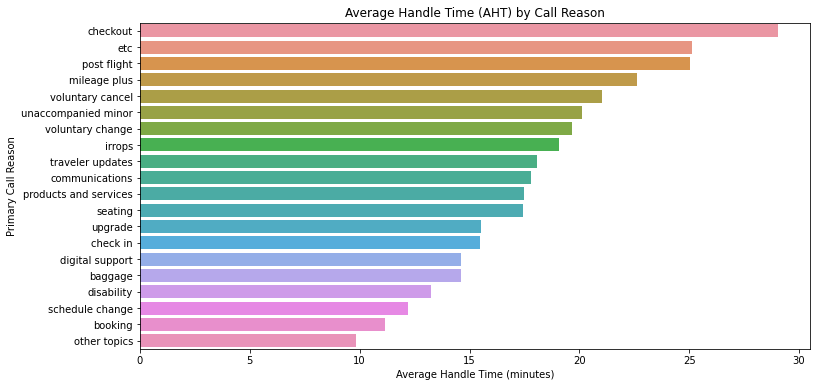

In [19]:
# Calculate AHT by primary call reason
aht_by_reason = df_calls.groupby('primary_call_reason')['AHT'].mean().reset_index()


aht_by_reason = aht_by_reason.sort_values(by='AHT', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='AHT', y='primary_call_reason', data=aht_by_reason.head(20))  # Display top 20 reasons
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('Average Handle Time (minutes)')
plt.ylabel('Primary Call Reason')
plt.show()


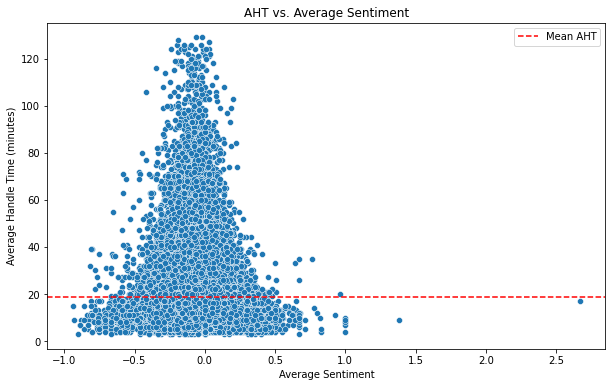

In [20]:
# Merge df_calls with df_sentiment to get sentiment data
df_calls = df_calls.merge(df_sentiment, on='call_id', how='left')


plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_sentiment', y='AHT', data=df_calls)
plt.title('AHT vs. Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Handle Time (minutes)')
plt.axhline(y=df_calls['AHT'].mean(), color='r', linestyle='--', label='Mean AHT')
plt.legend()
plt.show()


In [21]:
# Calculate AST for each call (time between call starting and agent answering)
df_calls['AST'] = (df_calls['agent_assigned_datetime'] - df_calls['call_start_datetime']).dt.total_seconds() / 60  # AST in minutes
df_calls.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,Agent: Thank you for calling United Airlines c...,38.0,voluntary cancel,963118.0,neutral,angry,-0.04,0.39,7.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,"Agent: Thank you for calling United Airlines, ...",15.0,booking,519057.0,calm,neutral,0.02,0.35,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,Agent: Thank you for calling United Airlines c...,27.0,irrops,158319.0,neutral,polite,-0.13,0.32,8.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,Agent: Thank you for calling United Airlines c...,12.0,upgrade,488324.0,neutral,frustrated,-0.20,0.20,5.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,Agent: Thank you for calling United Airlines c...,19.0,seating,721730.0,neutral,polite,-0.05,0.35,10.0


In [22]:

#Calculating the hig volume periods



df_calls['call_start_datetime'] = pd.to_datetime(df_calls['call_start_datetime'])


df_calls['call_date'] = df_calls['call_start_datetime'].dt.date
df_calls['call_hour'] = df_calls['call_start_datetime'].dt.hour


print(df_calls[['call_start_datetime', 'call_date', 'call_hour']].head())


call_volume = df_calls.groupby(['call_date', 'call_hour'])['call_id'].count().reset_index()
call_volume = call_volume.rename(columns={'call_id': 'call_count'})


print(call_volume.head())



high_volume_threshold = call_volume['call_count'].quantile(0.80)  # Top 20%


high_volume_periods = call_volume[call_volume['call_count'] > high_volume_threshold]


print(high_volume_periods)


  call_start_datetime   call_date  call_hour
0 2024-07-31 23:56:00  2024-07-31         23
1 2024-08-01 00:03:00  2024-08-01          0
2 2024-07-31 23:59:00  2024-07-31         23
3 2024-08-01 00:05:00  2024-08-01          0
4 2024-08-01 00:04:00  2024-08-01          0
    call_date  call_hour  call_count
0  2024-07-31         23           2
1  2024-08-01          0          21
2  2024-08-01          1          21
3  2024-08-01          2          18
4  2024-08-01          3          17
      call_date  call_hour  call_count
12   2024-08-01         11         112
14   2024-08-01         13         105
35   2024-08-02         10         106
57   2024-08-03          8         323
58   2024-08-03          9         346
..          ...        ...         ...
735  2024-08-31         14         336
736  2024-08-31         15         338
737  2024-08-31         16         373
738  2024-08-31         17         349
739  2024-08-31         18         295

[149 rows x 3 columns]


In [23]:
df_calls = df_calls.merge(high_volume_periods, on=['call_date', 'call_hour'], how='left', indicator='high_volume')
df_calls['high_volume'] = df_calls['high_volume'].apply(lambda x: 'Yes' if x == 'both' else 'No')

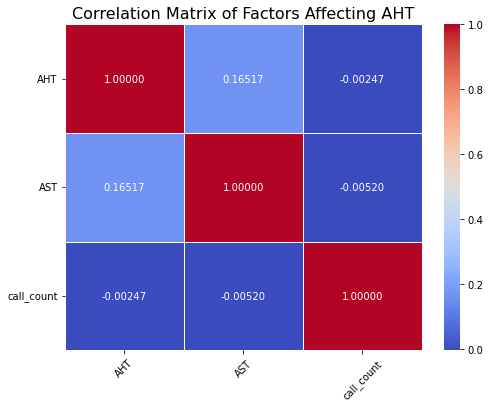

In [24]:
# Correlation matrix for relevant variables

correlation_matrix = df_calls[['AHT', 'AST', 'call_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f", linewidths=0.5)

plt.title('Correlation Matrix of Factors Affecting AHT', fontsize=16)
plt.xticks(rotation=45)  
plt.yticks(rotation=0)    


plt.show()



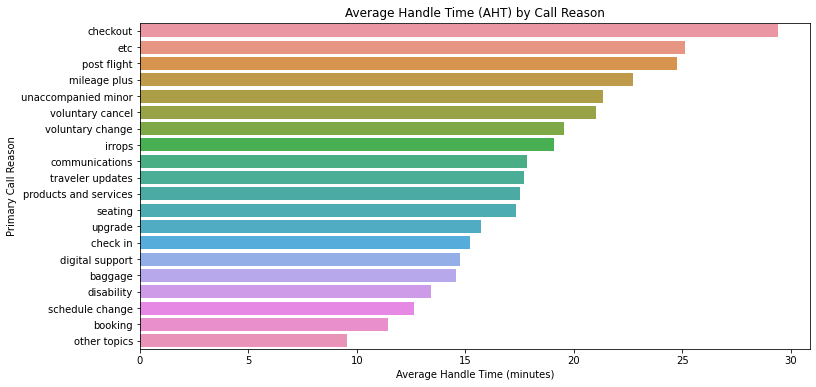

In [25]:
# AHT by primary call reason with high volume
aht_by_reason = df_calls[df_calls['high_volume'] == 'Yes'].groupby('primary_call_reason')['AHT'].mean().reset_index()
aht_by_reason = aht_by_reason.sort_values(by='AHT', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='AHT', y='primary_call_reason', data=aht_by_reason.head(20))  # Display top 20 reasons
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('Average Handle Time (minutes)')
plt.ylabel('Primary Call Reason')
plt.show()

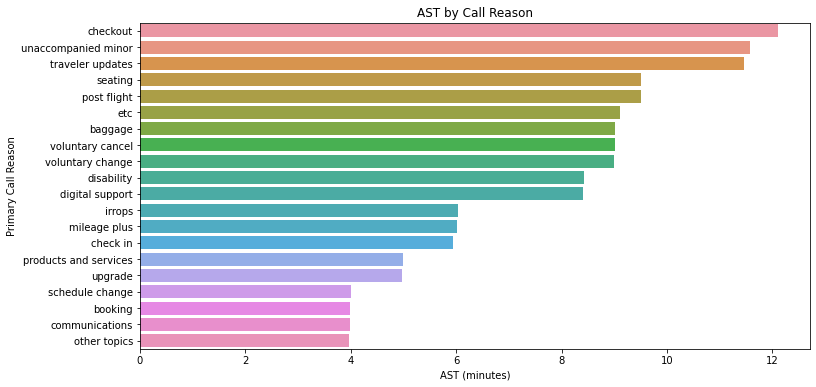

In [26]:
# AHT by primary call reason with high volume
aht_by_reason = df_calls[df_calls['high_volume'] == 'Yes'].groupby('primary_call_reason')['AST'].mean().reset_index()
aht_by_reason = aht_by_reason.sort_values(by='AST', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='AST', y='primary_call_reason', data=aht_by_reason.head(20))  # Display top 20 reasons
plt.title('AST by Call Reason')
plt.xlabel('AST (minutes)')
plt.ylabel('Primary Call Reason')
plt.show()

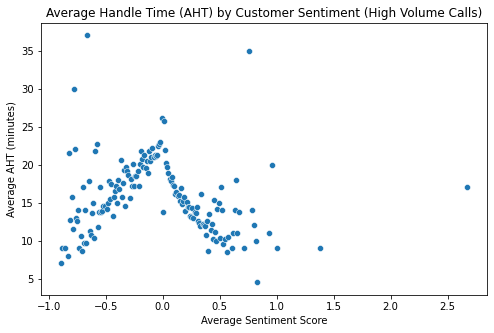

In [27]:
aht_by_sentiment = df_calls[df_calls['high_volume'] == 'Yes'].groupby('average_sentiment')['AHT'].mean().reset_index()

plt.figure(figsize=(8, 5))


sns.scatterplot(x='average_sentiment', y='AHT', data=aht_by_sentiment, palette='plasma')


plt.title('Average Handle Time (AHT) by Customer Sentiment (High Volume Calls)')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average AHT (minutes)')


plt.show()


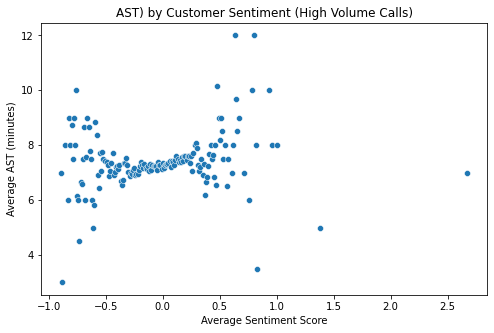

In [28]:
# Create a bar plot for AST by customer sentiment
aht_by_sentiment = df_calls[df_calls['high_volume'] == 'Yes'].groupby('average_sentiment')['AST'].mean().reset_index()


plt.figure(figsize=(8, 5))


sns.scatterplot(x='average_sentiment', y='AST', data=aht_by_sentiment)


plt.title('AST) by Customer Sentiment (High Volume Calls)')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average AST (minutes)')


plt.show()


In [29]:
# Most and Least frequent call reasons
most_frequent_reason = df_calls['primary_call_reason'].mode()[0]
least_frequent_reason = df_calls['primary_call_reason'].value_counts().idxmin()

# AHT for most and least frequent reasons
aht_most_frequent = df_calls[df_calls['primary_call_reason'] == most_frequent_reason]['AHT'].mean()
aht_least_frequent = df_calls[df_calls['primary_call_reason'] == least_frequent_reason]['AHT'].mean()

# Percentage difference
percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

print(f"AHT for Most Frequent Reason ({most_frequent_reason}): {aht_most_frequent:.2f} minutes")
print(f"AHT for Least Frequent Reason ({least_frequent_reason}): {aht_least_frequent:.2f} minutes")
print(f"Percentage Difference: {percentage_difference:.2f}%")


AHT for Most Frequent Reason (irrops): 19.09 minutes
AHT for Least Frequent Reason (unaccompanied minor): 20.12 minutes
Percentage Difference: -5.16%
